In [ ]:
# Import libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

sns.set()

In [ ]:
# load csv file

In [14]:
raw_data = pd.read_csv('C:/Users/HP Folio/Documents/projects data/inflation_project/New folder/macro-economic_indicator_data/economic_indicators_join.csv')

In [20]:
raw_data.head(3)

,Date_year,BDC,Crude_oil_prices,GDP,Inflation,MAX_LENDING_RATE,MONEY_SUPPLY
0,1993,36.65,18.43,19927993.25,57.17,34.41,165338.75
1,1994,60.50,17.20,19979123.44,57.03,21.08,230292.59
2,1995,84.15,18.43,20353202.25,72.84,20.95,289091.07


In [21]:
raw_data.describe()

,Date_year,BDC,Crude_oil_prices,GDP,Inflation,MAX_LENDING_RATE,MONEY_SUPPLY
count,25.000000,25.000000,25.000000,2.500000e+01,25.000000,25.000000,2.500000e+01
mean,2005.000000,147.698800,49.786400,4.067142e+07,18.467200,23.777600,6.884541e+06
std,7.359801,81.555514,29.805535,1.821093e+07,17.513725,4.173822,7.527622e+06
min,1993.000000,36.650000,14.420000,1.992799e+07,5.420000,18.360000,1.653388e+05
25%,1999.000000,100.100000,22.120000,2.244941e+07,8.510000,20.840000,6.289522e+05
50%,2005.000000,137.790000,43.290000,3.747495e+07,12.590000,22.620000,2.637913e+06
75%,2011.000000,160.860000,72.340000,5.751104e+07,16.550000,26.710000,1.217249e+07
max,2017.000000,395.420000,99.670000,6.902393e+07,72.840000,34.410000,2.236343e+07


In [ ]:
# drop column 'date_year'

In [17]:
data = raw_data.drop(['Date_year'], axis = 1)

data.head()

,BDC,Crude_oil_prices,GDP,Inflation,MAX_LENDING_RATE,MONEY_SUPPLY
0,36.65,18.43,19927993.25,57.17,34.41,165338.75
1,60.50,17.20,19979123.44,57.03,21.08,230292.59
2,84.15,18.43,20353202.25,72.84,20.95,289091.07
3,83.88,22.12,21177920.91,30.38,20.84,345853.96
4,85.76,20.61,21789097.84,10.85,20.24,413280.13


In [ ]:
# rename and re-order columns

In [22]:
data.columns.values

array(['BDC', 'Crude_oil_prices', 'GDP', 'Inflation', 'MAX_LENDING_RATE',
       'MONEY_SUPPLY'], dtype=object)

In [23]:
cols = ['BDC', 'Crude_oil_prices', 'GDP', 'MONEY_SUPPLY', 'MAX_LENDING_RATE','Inflation'
       ]

In [24]:
data1 = data[cols]

data1.head(3)

,BDC,Crude_oil_prices,GDP,MONEY_SUPPLY,MAX_LENDING_RATE,Inflation
0,36.65,18.43,19927993.25,165338.75,34.41,57.17
1,60.50,17.20,19979123.44,230292.59,21.08,57.03
2,84.15,18.43,20353202.25,289091.07,20.95,72.84


In [25]:
data2 = data1.rename(columns ={
        'BDC': 'bdc',
         'Crude_oil_prices': 'crude_oil_prices',
          'GDP': 'gdp',
            'MAX_LENDING_RATE': 'max_lending_rate',
                'MONEY_SUPPLY': 'money_supply',
                    'Inflation': 'inflation',
    })

In [26]:
data2.head(2)

,bdc,crude_oil_prices,gdp,money_supply,max_lending_rate,inflation
0,36.65,18.43,19927993.25,165338.75,34.41,57.17
1,60.50,17.20,19979123.44,230292.59,21.08,57.03


<AxesSubplot:xlabel='inflation', ylabel='Count'>

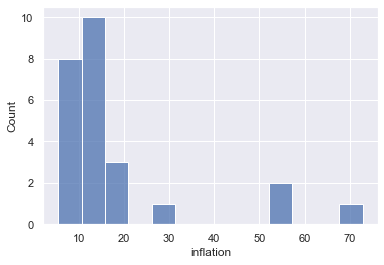

In [33]:
sns.histplot(data2['inflation'])

In [ ]:
# using  the OLS methos, calculate the effect of gdp,crude_oil_prices,gdp, money_supply 
# and max_lending_rate on inflation

In [28]:
y = data2['inflation']
x1 = data2[['bdc','crude_oil_prices','gdp','max_lending_rate','money_supply']]

In [29]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              inflation   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     2.376
Date:                Sat, 16 Oct 2021   Prob (F-statistic):             0.0779
Time:                        17:48:07   Log-Likelihood:                -100.47
No. Observations:                  25   AIC:                             212.9
Df Residuals:                      19   BIC:                             220.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               85.5325     37.745      2.266      0.035       6.532     164.533
bdc                 -0.1138      0.089     -1.281      0.216      -0.300       0.072
crude_oil_prices    -0.0623      0.281     -0.222      0.827      -0.650       0.525
gdp              -1.875e-06   1.23e-06     -1.521      0.145   -4.45e-06    7.05e-07
max_lending_rate    -0.1678      0.946     -0.177      0.861      -2.148       1.813
money_supply      4.804e-06   2.51e-06      1.912      0.071   -4.56e-07    1.01e-05
==============================================================================
Omnibus:                        4.167   Durbin-Watson:                   0.664
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                2.419
Skew:                           0.509   Prob(JB):                        0.298
Kurtosis:                       4.134   Cond. No.                     5.55e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.55e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
data.isnull()

,BDC,Crude_oil_prices,GDP,Inflation,MAX_LENDING_RATE,MONEY_SUPPLY
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [ ]:
# from the results of the analysis above we see an R-square of 0.385 and an 
# adjusted R-square of 0.223 which shows that the independent variables
# is responsible for a 22.3% variation in the dependent variable.

# we can also see from the p statistic of the independent variable that none
# of the explanatory variable are statistically significant (ie below 0.05)
# hence we can conclude that these variable do not significantly explain
# variation of our dependent varable.

# the recommendation is either to get more data on the variable for our model
# or use different variable in order to capture the variations in inflation